# EJERCICIO 3

**Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en 
base a ese pseudocódigo complete la siguiente función** 

In [11]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # alpha = # completar
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z  # = completar

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a  # = completar
        print(j, a, b, c[j], d)
        S  # = completar

        splines.append(S)
    splines.reverse()
    return splines

Las partes que necesitaron completarse fueron las siguientes:

**1. Calculo de coeficientes *alpha***

In [ ]:
alpha = [0] * (n) ''' <-- '''
for i in range(1, n):
    alpha[i] = (3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))

**2. Ecuación tridiagonal para *l*, *u* y *z***

In [ ]:
for i in range(1, n):
    l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
    u[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i] ''' <-- '''

**3. Cálculo de los coeficientes *b*, *c* y *d***

In [ ]:
for j in range(n - 1, -1, -1):
    c[j] = z[j] - u[j] * c[j + 1]
    b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
    d[j] = (c[j + 1] - c[j]) / (3 * h[j])
    a[j] = y ''' <-- ''[j]


**4. Definición del spline cúbico *S***

In [ ]:
S = (
    a[j]
    + b[j] * (x - xs[j])
    + c[j] * (x - xs[j]) ** 2
    + d[j] * (x - xs[j]) ** 3
)

## Implementación Completa

Cada par de puntos se interpola mediante un polinomio cúbico $S_j$ de la forma:

$$S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3$$

Los valores $x_s$ deben ser diferentes, pero no es necesario que estén ordenados ni que estén equiespaciados.

**Parámetros**

- **$x_s, y_s$:** Puntos a interpolar.

**Retorno**

- Una lista de expresiones simbólicas que representan la interpolación cúbica spline.

In [12]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])  # Sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1 
    h = [xs[i + 1] - xs[i] for i in range(n)] 

    alpha = [0] * (n)
    for i in range(1, n):
        alpha[i] = (3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1]))

    l = [1] + [0] * n
    u = [0] * n
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = 1
    z[n] = 0

    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    x = sym.Symbol("x")
    splines = []

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a[j] = ys[j]

        S = (
            a[j]
            + b[j] * (x - xs[j])
            + c[j] * (x - xs[j]) ** 2
            + d[j] * (x - xs[j]) ** 3
        )
        splines.append(S)

    splines.reverse()
    return splines

## Explicación del Código

**1. Ordenamiento de puntos**

Se asegura que los puntos (xs, ys) estén ordenados por x. Esto es necesario porque el método depende de que los puntos estén en un orden lógico para calcular las diferencias entre ellos.

**2. Cálculo de las distancias entre puntos (h)**

Calcula las diferencias entre los valores consecutivos de x. Estas distancias (h) son fundamentales para determinar la forma del sistema tridiagonal.

**3. Construcción de los coeficientes *alpha***

*alpha* se utiliza para calcular los coeficientes de los polinomios cúbicos. Representa el cambio de pendiente entre puntos consecutivos.

**4. Resolución del sistema tridiagonal**

Aquí se resuelve el sistema tridiagonal, que garantiza que las derivadas primeras y segundas sean continuas entre los splines. Siendo l, u, y z son coeficientes intermedios para la solución del sistema.

**5. Cálculo de los coeficientes a, b, c, d**

Calcula los coeficientes de los polinomios cúbicos:

- a[j]: valor en el punto de inicio del intervalo.

- b[j]: pendiente del spline en el intervalo.

- c[j], d[j]: coeficientes cuadrático y cúbico respectivamente.

**6. Definición del spline cúbico**

Se forma cada spline cúbico $S_j$ como un polinomio simbólico utilizando los coeficientes calculados. Estos polinomios se almacenan en la lista *splines*.

**7. Retorno de los splines**

Los splines se almacenan en orden inverso durante la iteración, así que se invierten antes de devolverlos. Se devuelve una lista de polinomios simbólicos que representan la interpolación cúbica.

# EJERCICIO 4

**Usando la función anterior, encuentre el spline cúbico para:**

$xs = [1, 2, 3]$

$ys = [2, 3, 5]$

In [14]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)

print('Splines:')
for i, s in enumerate(splines):
    print(f'S{i}:')
    display(s)

print('\nSplines expandidos:')
for i, s in enumerate(splines):
    print(f"S{i}:")
    display(s.expand())

Splines:
S0:


0.75*x + 0.25*(x - 1)**3 + 1.25

S1:


1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2


Splines expandidos:
S0:


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

S1:


-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

## Gráfico de los Splines

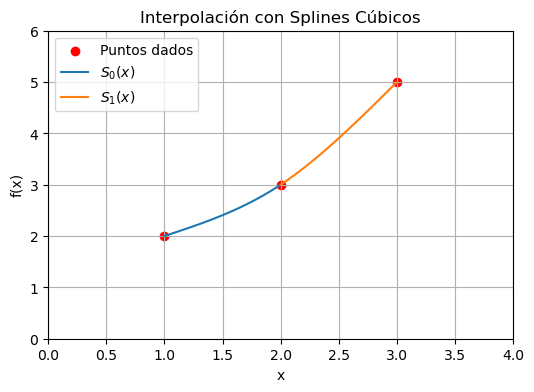

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(min(xs), max(xs), 500)

plt.figure(figsize=(6, 4))
plt.scatter(xs, ys, color="red", label="Puntos dados") 

for i, S in enumerate(splines):
    S_func = sym.lambdify(sym.Symbol("x"), S, modules=["numpy"])
    x_spline = x_vals[(x_vals >= xs[i]) & (x_vals <= xs[i + 1])]
    plt.plot(x_spline, S_func(x_spline), label=f"$S_{i}(x)$")

plt.title("Interpolación con Splines Cúbicos")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.xlim(0, 4)
plt.ylim(0, 6)
plt.legend()
plt.grid(True)
plt.show()

**GitHub:** [Tarea7 - @mateobtw18](https://github.com/mateobtw18/Tarea_7)